<a href="https://colab.research.google.com/github/Lwhieldon/House-Price-Prediction-Using-MD-Data-Portal/blob/master/cnn_last_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training A Convolutional Network from Scratch

[Dataset](https://www.kaggle.com/karakaggle/kaggle-cat-vs-dog-dataset)

[Kaggle Set-up](https://medium.com/@galhever/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

__Step-1__ Create a Kaggle account

__Step-2__ Sign-in Kaggle, go to `Account`.

__Step-3__ Under __API__ click `Create New API Token`


__Step-4__ Upload kaggle.json to colab

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving kaggle.json to kaggle.json


__Step-5__ Moving kaggle.json to `~/.kaggle folder

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

[chmod flags](http://www.zz9.co.za/chmod-permissions-flags-explained-600-0600-700-777-100-etc/)

__Step-6__ Download the dataset

In [ ]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

 98% 774M/787M [00:12<00:00, 65.1MB/s]
100% 787M/787M [00:13<00:00, 63.4MB/s]


__Step-7__ Unzip files

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('kaggle-cat-vs-dog-dataset.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

# Preparing Data for Deep Learning

[This part of the notebook is adapted from: Deep Learning with Python, by Francois Chollet](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb)

In [ ]:
import os, shutil, errno

In [ ]:
base_dir = 'cats_and_dogs_small'

try:
    os.mkdir(base_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass


train_dir = os.path.join(base_dir, 'train')
try:
    os.mkdir(train_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

validation_dir = os.path.join(base_dir, 'validation')
try:
    os.mkdir(validation_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

test_dir = os.path.join(base_dir, 'test')
try:
    os.mkdir(test_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
try:
    os.mkdir(train_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
try:
    os.mkdir(train_dogs_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
try:
    os.mkdir(validation_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
try:
    os.mkdir(test_cats_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
try:
    os.mkdir(test_dogs_dir)
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# Subsampling data

__Cats__

In [ ]:
original_dataset_dir = '/content/files/kagglecatsanddogs_3367a/PetImages'

In [ ]:
import random
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(random.sample(os.listdir(original_dataset_dir+'/Cat'), 3000), test_size = 1/6)
train, val = train_test_split(train, test_size = 0.2)

In [ ]:
for fname in train:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
for fname in val:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
for fname in test:
    src = os.path.join(original_dataset_dir, 'Cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

__Dogs__

In [ ]:
train, test = train_test_split(random.sample(os.listdir(original_dataset_dir+'/Dog'), 2000), test_size = 1/4)
train, val = train_test_split(train, test_size = 1/3)

original_dataset_dir = original_dataset_dir+'/Dog'

# Copy first 1000 dog images to train_dogs_dir
for fname in train:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
for fname in val:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
for fname in test:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

FileNotFoundError: ignored

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 2000


In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 2000


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [ ]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [ ]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [ ]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


# CNN with Keras

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



# Preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 182s 910ms/step - loss: 0.6818 - acc: 0.5650 - val_loss: 0.6417 - val_acc: 0.6600
Epoch 2/10
200/200 [==============================] - 180s 901ms/step - loss: 0.6119 - acc: 0.6597 - val_loss: 0.5972 - val_acc: 0.6640
Epoch 3/10
200/200 [==============================] - 182s 909ms/step - loss: 0.5646 - acc: 0.7015 - val_loss: 0.5611 - val_acc: 0.7130
Epoch 4/10
200/200 [==============================] - 181s 903ms/step - loss: 0.5302 - acc: 0.7295 - val_loss: 0.5586 - val_acc: 0.7110
Epoch 5/10
200/200 [==============================] - 178s 892ms/step - loss: 0.5042 - acc: 0.7490 - val_loss: 0.5214 - val_acc: 0.7460
Epoch 6/10
200/200 [==============================] - 182s 909ms/step - loss: 0.4754 - acc: 0.7667 - val_loss: 0.5053 - val_acc: 0.7580
Epoch 7/10
200/200 [==============================] - 178s 892ms/step - loss: 0.4394 - acc: 0.7955 - val_loss: 0.5015 - val_acc: 0.7710
Epoch 8/10
200/200 [==============================] - 179s 

# Saving and Loading Models


In [ ]:
from tensorflow import keras
model.save('cats_and_dogs_small_1.h5')
trained_model = keras.models.load_model('cats_and_dogs_small_1.h5')

In [ ]:
! ls

cats_and_dogs_small	  files				 kaggle.json
cats_and_dogs_small_1.h5  kaggle-cat-vs-dog-dataset.zip  sample_data


In [ ]:
trained_model.get_layer('dense_2').weights[1]

<tf.Variable 'dense_2/bias:0' shape=(512,) dtype=float32, numpy=
array([ 0.00669626,  0.00830256, -0.00673699,  0.00854748, -0.00124895,
       -0.00662949, -0.00327747,  0.00784187, -0.005794  ,  0.00635008,
        0.00952533,  0.0078209 ,  0.00923223, -0.00551558, -0.00655535,
       -0.00164781, -0.00106356, -0.0015779 ,  0.00908749,  0.00703701,
       -0.00553896,  0.00848371,  0.00999994, -0.00458416,  0.00755906,
        0.00801925,  0.00810018,  0.01040243, -0.00108973, -0.00501122,
        0.00779979, -0.00434801, -0.00516217,  0.00699206, -0.00568006,
        0.00963317, -0.00452458, -0.00452385, -0.00256395,  0.00928252,
       -0.00576988, -0.00524577,  0.00842505,  0.0093037 ,  0.01006086,
        0.00987757,  0.01033681,  0.00954949,  0.00107287, -0.00154226,
       -0.00147909,  0.01083704, -0.00608211,  0.0080755 , -0.00623793,
       -0.00623018, -0.00510828, -0.00624774, -0.00647235,  0.01076014,
        0.00752429, -0.00264225, -0.00654056, -0.0056221 , -0.00144859,

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

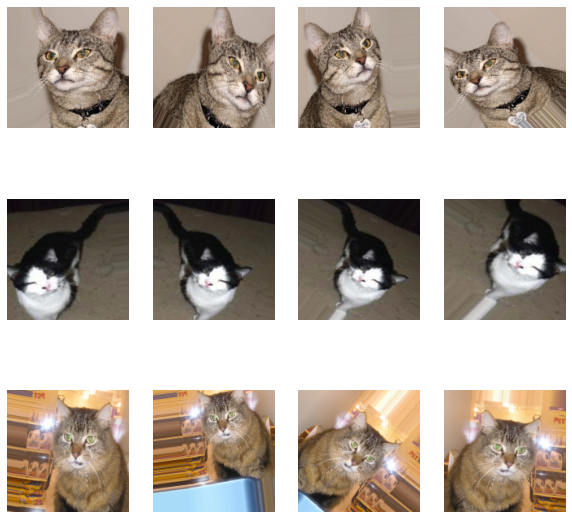

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

plt.figure(figsize=(10, 10))
image_list = []
## creating the image list as arrays
for img in [image.load_img(img_path, target_size=(150, 150)) for img_path in random.sample(fnames, 3)]:
  x = image.img_to_array(img)
  x = x.reshape((1,) + x.shape)
  ## Data Augmentation
  j = 0
  for batch in datagen.flow(x, batch_size=1):
    image_list.append(image.array_to_img(batch[0]))
    j+=1
    if j % 4==0:
      break

## plotting
for i, img in enumerate(image_list):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.axis("off")

__Continue Training with Augmented Data__

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = trained_model.fit_generator(
      train_generator,
      epochs=2,
      validation_data=validation_generator)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
 89/125 [====================>.........] - ETA: 52s - loss: 0.5843 - acc: 0.6970

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

125/125 [==============================] - 194s 2s/step - loss: 0.5774 - acc: 0.7025 - val_loss: 0.4920 - val_acc: 0.7520
Epoch 2/2
125/125 [==============================] - 194s 2s/step - loss: 0.5532 - acc: 0.7128 - val_loss: 0.4961 - val_acc: 0.7750


In [ ]:
trained_model.save('augmented_model.h5')

In [ ]:
import tensorflow as tf

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(min_delta= 0.01, patience=1),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
]

In [ ]:
history = trained_model.fit(
      train_generator,
      epochs=5,
      validation_data=validation_generator, 
      callbacks=my_callbacks)

NameError: ignored

In [ ]:
(a) = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 1000 images belonging to 2 classes.


In [ ]:
b = next(a)

In [ ]:
b[1].shape

(32,)

In [ ]:
trained_model.predict(b[0])

array([[0.24696657],
       [0.18748862],
       [0.70808065],
       [0.84947675],
       [0.77559316],
       [0.77904737],
       [0.67821234],
       [0.7068082 ],
       [0.5676304 ],
       [0.3708619 ],
       [0.21549505],
       [0.7863334 ],
       [0.17124411],
       [0.60609937],
       [0.12448436],
       [0.9086588 ],
       [0.5454953 ],
       [0.53640354],
       [0.32789388],
       [0.86674225],
       [0.10474607],
       [0.14194733],
       [0.96177614],
       [0.7209261 ],
       [0.6350772 ],
       [0.7892862 ],
       [0.7845301 ],
       [0.57481855],
       [0.54614836],
       [0.96510386],
       [0.68054676],
       [0.33602628]], dtype=float32)

# Further Study and Resources

[Transfer Learning and Fine Tuning](https://keras.io/guides/transfer_learning/)

[Deep Learning with Python - Transfer Learning](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.3-using-a-pretrained-convnet.ipynb)

[TensorBoard For Visualizations](https://www.tensorflow.org/tensorboard/get_started)

[Keras CallBacks API](https://keras.io/api/callbacks/)

[Kaggle-Dogs-Cats Dataset](https://www.kaggle.com/karakaggle/kaggle-cat-vs-dog-dataset)

[Deep Learning with Pyhton](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb)

[Keras Data Preprocessing](https://keras.io/api/preprocessing/image/)

# Extras

Note that you can either use TensorBoard or Matplotlib for visualizing the model's performance on train and validation set.

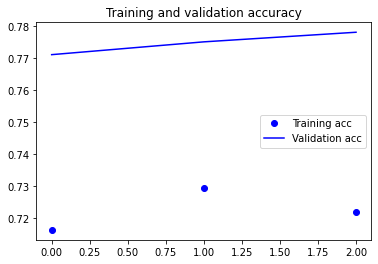

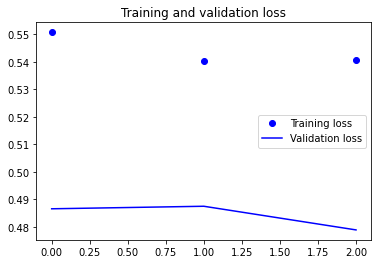

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()